In [59]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
import seaborn as sns

import trompy as tp

colors_PVH = "#219C90"
colors_VMH  = "#90219c"

colors = [colors_PVH, colors_VMH]

cmap = "RdBu_r"

In [60]:
DATAFOLDER = Path("C:/Data/hislight_pickles/")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/figures/figs_for_revised_version")

with open(DATAFOLDER / "restricted_dark.pickle", 'rb') as handle:
    PVH = pickle.load(handle)

with open(DATAFOLDER / "HL3_restricted_dark.pickle", 'rb') as handle:
    VMH = pickle.load(handle)    

In [61]:
PVH_list_of_mice = []
VMH_list_of_mice = []

mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                    "HL202", "HL205", "HL206", "HL211",
                    "HL301", "HL304", "HL305"]

#"HL202", "HL205", "HL206", "HL211" have poor placements without virus in PVH
#HL 306, 308 have no virus
#HL301, HL304, HL305 have poor fiber placement
#HL313 - HL318 are control mice


for key, val in PVH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in PVH_list_of_mice:
            PVH_list_of_mice.append(val["mouse_ID"])
        
for key, val in VMH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in VMH_list_of_mice:
            VMH_list_of_mice.append(val["mouse_ID"])

In [62]:
def get_snips(data, mice):
    all_snips = []  
    snip_counts = []  # List to store the count of snips for each mouse
    kwargs = {"bins": 150, "trial_length": 15, "baseline_length": 5}
    pre = 5
    post = 10
    mineventlength = 8
    binlength = 0.1
    for mouse in mice:
        snips_full = []  # List to collect snips for the current mouse
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                if len(val["licks"]) < 10:
                    continue
                lickdata = tp.lickCalc(val["licks"], minrunlength=3)
                snipper = tp.Snipper(
                    val["corrected"],
                    lickdata["rStart"],
                    end=lickdata["rEnd"],
                    fs=val["fs"],
                    pre=pre,
                    post=post,
                    binlength=binlength,
                    zscore=True
                )
                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=8, eventbalance=[6, 2])
                snipper.find_potential_artifacts(threshold=12, method="absolute_diff", showplot=True, remove=True)
                snips_full.append(snipper.snips)
        
        try:
            snips_full = np.vstack(snips_full)
            all_snips.append(snips_full)  # Append the snips for this mouse
            snip_counts.append(snips_full.shape[0])  # Record the count of snips for this mouse
            print(f"Adding snips for mouse {mouse}: {snips_full.shape[0]} runs")
        except:
            print(f"No snips to concatenate for mouse {mouse}")
            snip_counts.append(0)  # Record zero snips if none were collected
    # Concatenate all snips across all mice into a single array
    if all_snips:
        all_snips = np.vstack(all_snips)
    else:
        all_snips = np.array([])  # Return an empty array if no snips were collected
    return all_snips, snip_counts

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL203: 18 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL204: 43 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL207: 36 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 2 potential artifacts.
Adding snips for mouse HL208: 45 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL209: 41 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL210: 39 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
Adding snips for mouse HL212: 26 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL302: 37 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL303: 31 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

No artifacts found.
Adding snips for mouse HL307: 39 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL309: 19 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL310: 35 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL311: 43 runs
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
Adding snips for mouse HL312: 34 runs


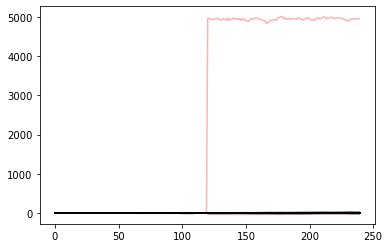

In [63]:
PVH_snips_mean_full, PVH_count = get_snips(PVH, PVH_list_of_mice)
VMH_snips_mean_full, VMH_count = get_snips(VMH, VMH_list_of_mice)

In [64]:
len(PVH_snips_mean_full)

248

In [65]:
len(VMH_snips_mean_full)

238

In [66]:
pre = 5
post = 10
mineventlength=8
binlength=0.1

eventbalance=[6,2]

In [67]:
def sort_snips_by_time_period(snips, time_period):

    start, end = time_period
    time_period_indices = range(start, end)

    time_period_means = np.mean(snips[:, time_period_indices], axis=1)

    sorted_indices = np.argsort(-time_period_means)

    sorted_snips = snips[sorted_indices]
    return sorted_snips

In [68]:
time_period = (140, 240)

sorted_snips_PVH = sort_snips_by_time_period(PVH_snips_mean_full, time_period)
sorted_snips_VMH = sort_snips_by_time_period(VMH_snips_mean_full, time_period)


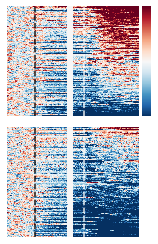

In [69]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[2,3.2],
                                        gridspec_kw={"width_ratios":[15,1],
                                                     "wspace": 0.05,
                                                     "hspace": 0.1,
                                                     "left": 0,
                                                     "top": 1,
                                                     "bottom": 0,
                                                     "right": 1})



sns.heatmap(sorted_snips_PVH, ax=ax1, cbar_ax= ax2, cmap=cmap, vmax=3, vmin=-3,
            cbar_kws={"ticks": []})
sns.heatmap(sorted_snips_VMH, ax=ax3, cbar_ax= ax4, cmap=cmap, vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]})

ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="k", linestyle="--", alpha=0.9)
ax1.axvline(140, color="white", linestyle="--", alpha=0.9)

ax3.set_yticks([])
ax3.set_xticks([])
ax3.axvline(50, color="black", linestyle="--", alpha=0.9)
ax3.axvline(140, color="white", linestyle="--", alpha=0.9)

#f.savefig(FIGSFOLDER / "fig_4_PVH_vs_VMH_heatmap_trials.pdf")


In [78]:
#ADDING IN RANDOM SEED 
def consecutive_threshold(significant_times, min_consecutive):
    significant_periods = []
    start = None
    for i, is_significant in enumerate(significant_times):
        if is_significant:
            if start is None:
                start = i
        else:
            if start is not None:
                if i - start >= min_consecutive:
                    significant_periods.append((start, i))
                start = None
    # Check if the last period is significant
    if start is not None and len(significant_times) - start >= min_consecutive:
        significant_periods.append((start, len(significant_times)))
    return significant_periods
def analyze_peri_event_activity_with_bootstrapping(data, n_bootstraps=1000, min_consecutive=6):
    bootstrap_means = np.zeros((n_bootstraps, data.shape[1]))
    
    # Perform bootstrapping (resample with replacement)
    np.random.seed(42)
    for i in range(n_bootstraps):
        resample_indices = np.random.choice(data.shape[0], size=data.shape[0], replace=True)
        bootstrap_means[i, :] = np.mean(data[resample_indices, :], axis=0)
    
    # Calculate the 2.5th and 97.5th percentiles for the bootstrapped confidence intervals
    ci_lower = np.percentile(bootstrap_means, 2.5, axis=0)
    ci_upper = np.percentile(bootstrap_means, 97.5, axis=0)
    
    # Calculate the mean across all bootstrap samples (for plotting)
    means = np.mean(bootstrap_means, axis=0)
    
    # Flag the time points where the CI does not contain 0
    significant_above_zero = ci_lower > 0  # Significantly greater than zero
    significant_below_zero = ci_upper < 0  # Significantly less than zero
    # Combine significant times above and below zero
    significant_times = significant_above_zero | significant_below_zero
    # Apply consecutive thresholding
    significant_periods_above = consecutive_threshold(significant_above_zero, min_consecutive)
    significant_periods_below = consecutive_threshold(significant_below_zero, min_consecutive)
    significant_periods = consecutive_threshold(significant_times, min_consecutive)
    
    # Prepare the results dictionary
    results = {
        'significant_times_above': significant_above_zero,
        'significant_times_below': significant_below_zero,
        'significant_periods_above': significant_periods_above,
        'significant_periods_below': significant_periods_below,
        'significant_periods': significant_periods,
        'means': means,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }
    return results

In [87]:
bootstraps = 1000
min_consecutive = 6

BS_PVH = analyze_peri_event_activity_with_bootstrapping(PVH_snips_mean_full, n_bootstraps=bootstraps, min_consecutive=min_consecutive)
BS_VMH = analyze_peri_event_activity_with_bootstrapping(VMH_snips_mean_full, n_bootstraps=bootstraps, min_consecutive=min_consecutive)


In [88]:
BS_PVH['significant_periods']

[(37, 45), (65, 110), (120, 168), (184, 240)]

In [45]:
def compare_peri_event_activity(data1, data2, n_bootstraps=1000, min_consecutive=6):
    # Initialize arrays to store bootstrap means
    bootstrap_means1 = np.zeros((n_bootstraps, data1.shape[1]))
    bootstrap_means2 = np.zeros((n_bootstraps, data2.shape[1]))
    
    # Perform bootstrapping for both datasets
    for i in range(n_bootstraps):
        resample_indices1 = np.random.choice(data1.shape[0], size=data1.shape[0], replace=True)
        resample_indices2 = np.random.choice(data2.shape[0], size=data2.shape[0], replace=True)
        
        bootstrap_means1[i, :] = np.mean(data1[resample_indices1, :], axis=0)
        bootstrap_means2[i, :] = np.mean(data2[resample_indices2, :], axis=0)
    
    # Calculate the 2.5th and 97.5th percentiles for the bootstrapped confidence intervals
    ci_lower1 = np.percentile(bootstrap_means1, 2.5, axis=0)
    ci_upper1 = np.percentile(bootstrap_means1, 97.5, axis=0)
    ci_lower2 = np.percentile(bootstrap_means2, 2.5, axis=0)
    ci_upper2 = np.percentile(bootstrap_means2, 97.5, axis=0)
    
    # Identify significant periods where CIs do not overlap
    significant_non_overlap = (ci_lower1 > ci_upper2) | (ci_lower2 > ci_upper1)
    
    # Apply consecutive thresholding
    significant_periods_non_overlap = consecutive_threshold(significant_non_overlap, min_consecutive)
    
    # Prepare the results dictionary
    results = {
        'ci_lower1': ci_lower1,
        'ci_upper1': ci_upper1,
        'ci_lower2': ci_lower2,
        'ci_upper2': ci_upper2,
        'significant_non_overlap': significant_non_overlap,
        'significant_periods_non_overlap': significant_periods_non_overlap
    }
    return results

In [46]:
sig_no_overlap= compare_peri_event_activity(PVH_snips_mean_full, VMH_snips_mean_full)

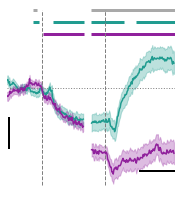

In [90]:
data_PVH = BS_PVH["means"]
data_VMH = BS_VMH["means"]

ci_lower_PVH = BS_PVH["ci_lower"]
ci_upper_PVH = BS_PVH["ci_upper"]
ci_lower_VMH = BS_VMH["ci_lower"]
ci_upper_VMH = BS_VMH["ci_upper"]

indices = np.arange(len(data_PVH))
mask1 = indices <= 109
mask2 = indices >= 121

f, ax = plt.subplots(figsize=[3, 3.5])
# Plot the data
ax.plot(indices[mask1], data_PVH[mask1], color=colors_PVH, label='PVH')
ax.plot(indices[mask2], data_PVH[mask2], color=colors_PVH)
ax.plot(indices[mask1], data_VMH[mask1], color=colors_VMH, label='VMH')
ax.plot(indices[mask2], data_VMH[mask2], color=colors_VMH)

# Plot the confidence intervals using fill_between
ax.fill_between(indices[mask1], ci_lower_PVH[mask1], ci_upper_PVH[mask1], color=colors_PVH, alpha=0.3)
ax.fill_between(indices[mask2], ci_lower_PVH[mask2], ci_upper_PVH[mask2], color=colors_PVH, alpha=0.3)
ax.fill_between(indices[mask1], ci_lower_VMH[mask1], ci_upper_VMH[mask1], color=colors_VMH, alpha=0.3)
ax.fill_between(indices[mask2], ci_lower_VMH[mask2], ci_upper_VMH[mask2], color=colors_VMH, alpha=0.3)

# Highlight significant periods
significant_periods_PVH = BS_PVH['significant_periods']
significant_periods_VMH = BS_VMH['significant_periods']
significant_differences = sig_no_overlap['significant_periods_non_overlap']

for start, end in significant_differences:
    ax.hlines(y=2.6, xmin=start, xmax=end, color="#A9A9A9", linewidth=3)
for start, end in significant_periods_PVH:
    ax.hlines(y=2.2, xmin=start, xmax=end, color=colors_PVH, linewidth=3)
for start, end in significant_periods_VMH:
    ax.hlines(y=1.8, xmin=start, xmax=end, color=colors_VMH, linewidth=3)
    
# Add additional plot elements
ax.hlines(y=0, xmin=0, xmax=240, color="grey", linewidth=1, linestyle="dotted")
ax.vlines(x=50, ymin=-3.2, ymax=2.6, color="grey", linewidth=1, linestyle="--")
ax.vlines(x=140, ymin=-3.2, ymax=2.6, color="grey", linewidth=1, linestyle="--")

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylim(-3.6, 2.7)
ax.set_xlim(0, 240)

#scale bars
ax.plot([190,240], [-0.8, -0.8], linewidth=2, color="k", transform=blended_transform_factory(ax.transData, ax1.transAxes))
ax.plot([2,2], [-1, -2], linewidth=2, color="k")

plt.show()

f.savefig(FIGSFOLDER / "fig_4_PVH_vs_VMH_bootstrap.pdf")

In [91]:
BS_PVH['significant_periods']

[(37, 45), (65, 110), (120, 168), (184, 240)]

In [92]:
BS_VMH['significant_periods']

[(52, 110), (120, 240)]

In [93]:
PVH_count

[18, 43, 36, 45, 41, 39, 26]

In [94]:
VMH_count

[37, 31, 39, 19, 35, 43, 34]

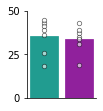

In [21]:
# lick bouts per mouse by condition

f,ax=plt.subplots(figsize=(1.2,1.6))
f.subplots_adjust(wspace=0.4, left=0.1)

tp.barscatter([PVH_count,
                VMH_count,],
              barfacecolor=colors,
              barfacecolor_option="individual",
              baredgecolor=colors,
              baredgecolor_option="individual",
              scattersize=20,
              scatteralpha=0.6,
              scatterlinecolor= "grey",
              ax=ax)

#ax.set_yticklabels([])
ax.set_ylim([0, 50])
ax.set_yticks([0, 25, 50])

#f.savefig(FIGSFOLDER / "licks_per_session_ALL_2.pdf")